## Лабораторная работа №1 | Вариант 5

Выполнил: Seriy Nikita

### 1. Numpy

In [319]:
import numpy as np

1. Создайте единичную матрицу размером 3х3

- Для этого использован метод `np.identity()`, который задаёт единичную матрицу размера `NxN` без возможности манипуляций входными аргументами над главной диагональю. 

In [320]:
diagonal_ones_matrix = np.identity(3)
print(diagonal_ones_matrix)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


2. Создайте кастомный dtype который описывает цвет состоящий из 4х unsigned bytes(RGBA пиксель)

- Использован метод `np.dtype` и тип `uint8`. После вывода типа на экран получим тип `u1`. 
- `u1` — это краткая запись этого типа данных в NumPy.
- Форматирование согласно pep-8.

In [321]:
rgba_dtype = np.dtype([
    ('R', np.uint8),  
    ('G', np.uint8),  
    ('B', np.uint8),  
    ('A', np.uint8)   
])

print(rgba_dtype)

[('R', 'u1'), ('G', 'u1'), ('B', 'u1'), ('A', 'u1')]


3. Как игнорировать все numpy warnings(не рекомендуем к использованию)?

- В разделе `floating point error handling` есть метод `np.setter()`. Пример взят на основе документации.

In [322]:
orig_settings = np.seterr(all='ignore')  
np.seterr(over='raise')
try:
    print(np.int16(32000) * np.int16(3))  # 96000 выходит за пределы допустимого диапазона для int16 (который от -32768 до 32767) 
except FloatingPointError as e:
    print("Caught error:", e)
    
np.seterr(**orig_settings)

Caught error: overflow encountered in scalar multiply


{'divide': 'ignore', 'over': 'raise', 'under': 'ignore', 'invalid': 'ignore'}

4. Создайте случайный вектор размера 10 и отсортируйте его

In [323]:
random_vector = np.random.rand(10)
sorted_random_vector = np.sort(random_vector)[::1]
print(sorted_random_vector)

[0.03229647 0.08149955 0.13910073 0.26438688 0.44404226 0.5222251
 0.54729827 0.68447495 0.76538299 0.99537244]


5. Создайте read-only массив(неизменяемый)

In [324]:
random_array = np.random.rand(5, 5)
random_array.flags.writeable = False
try:
    random_array[0, 0] = 10  
except ValueError as e:
    print("Ошибка:", e)

Ошибка: assignment destination is read-only


6. Рассмотрим случайную матрицу размером 10х2, представляющую декартовы координаты, преобразуем их в полярные координаты

In [325]:
cartesian_coordinates = np.random.rand(10, 2)

x = cartesian_coordinates[:, 0]
y = cartesian_coordinates[:, 1]

r = np.sqrt(x**2 + y**2)

theta = np.arctan2(y, x)
polar_coordinates = np.column_stack((r, theta))

print("Декартовы координаты (x, y):", cartesian_coordinates, sep='\n', end='\n\n')
print("Полярные координаты (r, θ):", polar_coordinates, sep='\n')

Декартовы координаты (x, y):
[[0.52010408 0.43555297]
 [0.20208113 0.34546083]
 [0.97110028 0.34864307]
 [0.10655358 0.33331295]
 [0.03301247 0.6187564 ]
 [0.81313583 0.42876301]
 [0.88804616 0.74619038]
 [0.31518889 0.46859735]
 [0.21746266 0.04250629]
 [0.48462852 0.74866209]]

Полярные координаты (r, θ):
[[0.67839122 0.69715361]
 [0.40022489 1.04150827]
 [1.03178862 0.34468651]
 [0.34993026 1.26138342]
 [0.61963643 1.51749393]
 [0.91925383 0.48524495]
 [1.15992502 0.69881272]
 [0.56473668 0.97868213]
 [0.22157796 0.19303098]
 [0.89182943 0.99630311]]


7. Создайте структурированный массив с координатами x и y, охватывающий область [0,1]x[0,1]

In [326]:
# 1) Задаю тип данных с полями x и y
coord_dtype = np.dtype([('x', np.float64), ('y', np.float64)])

# 2) Создаю равномерную сетку координат
n_points = 5  # Число точек на каждой оси 
x_values = np.linspace(0, 1, n_points)
y_values = np.linspace(0, 1, n_points)

x_grid, y_grid = np.meshgrid(x_values, y_values)

# 3) Создаю структурированный массив с координатами x и y
structured_array = np.zeros((n_points * n_points,), dtype=coord_dtype)
structured_array['x'] = x_grid.ravel()
structured_array['y'] = y_grid.ravel()

print("Структурированный массив координат (x, y):", structured_array, sep='\n')

Структурированный массив координат (x, y):
[(0.  , 0.  ) (0.25, 0.  ) (0.5 , 0.  ) (0.75, 0.  ) (1.  , 0.  )
 (0.  , 0.25) (0.25, 0.25) (0.5 , 0.25) (0.75, 0.25) (1.  , 0.25)
 (0.  , 0.5 ) (0.25, 0.5 ) (0.5 , 0.5 ) (0.75, 0.5 ) (1.  , 0.5 )
 (0.  , 0.75) (0.25, 0.75) (0.5 , 0.75) (0.75, 0.75) (1.  , 0.75)
 (0.  , 1.  ) (0.25, 1.  ) (0.5 , 1.  ) (0.75, 1.  ) (1.  , 1.  )]


8. Учитывая два массива X и Y, постройте матрицу Коши $C$ ($C_{ij} =\frac{1}{x_i - y_j}$)

In [327]:
x = np.random.normal(size=(5))
y = np.random.normal(size=(5))

# 1. Выбор элементов вдоль оси с помощью двоеточия
# 2. повышение размерности матрицы Х добавлением новой оси

C = 1.0 / (x[:, np.newaxis] - y) 
print("Массив x:", x, "Массив y:", y, sep='\n', end='\n\n')
print("Матрица Коши C:", C, sep='\n', end='\n')


Массив x:
[ 1.28255088  0.60557906 -0.21157023 -0.36832285  0.61080511]
Массив y:
[-1.27901701  0.4429351   0.47235174  0.12007221 -0.44380907]

Матрица Коши C:
[[ 0.39038591  1.19102096  1.23426446  0.86023084  0.57925347]
 [ 0.53061768  6.1483993   7.50596835  2.0597032   0.95293626]
 [ 0.93681486 -1.52787144 -1.46215509 -3.01529557  4.30591205]
 [ 1.09806348 -1.23265357 -1.18952091 -2.04752276 13.24745066]
 [ 0.52915033  5.95699025  7.22264867  2.03776844  0.94821407]]


9. Как конвертировать массив float(32 bit) к массиву целых чисел (integer 32 bit) in place?

In [328]:
float_array = np.array([1.5, 2.3, 3.7, 4.9], dtype=np.float32)
float_array = np.round(float_array).astype(np.int32, copy=False) 
print(float_array)

[2 2 4 5]


10. Как случайно заменить p элементов в 2D массиве?

In [329]:
array = np.arange(25).reshape(5, 5)
print("Исходный массив:", array, sep='\n', end='\n\n')

p = 5 
n_rows, n_cols = array.shape

# Генерация p случайных индексов в развернутом массиве 
random_indices = np.random.choice(n_rows * n_cols, p, replace=False)

# Преобразование одномерных индексов в двумерные
row_indices, col_indices = np.unravel_index(random_indices, (n_rows, n_cols))

# Замена выбранных элементы на новые значения (например, на -1)
array[row_indices, col_indices] = -1
print("Массив после замены:", array, sep='\n')

Исходный массив:
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]

Массив после замены:
[[ 0  1  2  3  4]
 [ 5 -1  7 -1  9]
 [10 11 12 13 14]
 [-1 16 -1 -1 19]
 [20 21 22 23 24]]


### 2. Pandas

Найдите ответы на вопросы или выполните действия с предложенным датасетом 

Классический начальный набор данных - данные пассажиров титаника.

Файл: `df.csv`

```
PassangerId - уникальный номер пассажира
Survived - выжил человек или нет
Pclass - класс обслуживания
Name - имя человека, обращение к ней/нему
Sex - пол человека
Age - возраст на момент крушения
SibSp - количество братьев и сестер / супругов на борту "Титаника"
Parch - количество родителей / детей на борту "Титаника"
Ticket - номер билета
Fare - стоимость проезда для пассажиров
Cabin - каюта
Embarked - причал отбытия. C = Cherbourg Q = Queenstown S = Southampton
```

In [330]:
import pandas as pd

In [331]:
df = pd.read_csv('data.csv')
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


1. Узнайте сколько было на борту человек

In [332]:
total_passengers_number = df.shape[0]
print("Число пассажиров на борту:", total_passengers_number)

Число пассажиров на борту: 891


2. Какой медианный и средний возраста пассажиров

In [333]:
median_age = round(df['Age'].median(), 2)
mean_age = round(df['Age'].mean(), 2)

print("Медианный возраст: ", median_age, "Средний возраст", mean_age, sep='\n')

Медианный возраст: 
28.0
Средний возраст
29.7


3. Посчитайте процент выживаемости детей(до 16 лет) и взрослых

In [334]:
# 1) Разделяю пассажиров на детей и взрослых
kids = df[df['Age'] < 16]
adults = df[df['Age'] >= 16]

# 2) Считаю процент выживших среди подгрупп
kids_survival_rate = round((kids['Survived'].mean()) * 100, 2)
adults_survival_rate = round((adults['Survived'].mean()) * 100, 2)

print("Процент выживаемости детей:", kids_survival_rate, end='\n')
print("Процент выживаемости взрослых:", adults_survival_rate)

Процент выживаемости детей: 59.04
Процент выживаемости взрослых: 38.19


4. Верна ли гипотеза, что женщины и дети сажались в шлюпки первыми и выживали больше?

- Результаты косвенно `подтверждают`, что женщины и дети имели приоритет на спасение.
- В условиях ограниченности спасательных шлюпок выживаемость тесно связана с тем, кто первым получает доступ к ним. 

In [335]:
# 1) Выделим 3 группы: женщин, детей, их объединение
women = df[df['Sex'] == 'female']
kids = df[df['Age'] < 16]
women_and_kids = df[(df['Sex'] == 'female') | (df['Age'] < 16)]

# 2) Вычислим процент выживаемости в группах
survival_rate_women = round(women['Survived'].mean() * 100, 2)
survival_rate_kids = round(kids['Survived'].mean() * 100, 2)
survival_rate_women_and_kids = round(women_and_kids['Survived'].mean() * 100, 2)

print(survival_rate_women, survival_rate_kids, survival_rate_women_and_kids, sep='\n')


74.2
59.04
71.75


5. Зависит ли выживаемость от класса обслуживания?

- Коэффициент корреляции −0.34 указывает на среднюю отрицательную корреляцию.
- Это означает, что с ростом одной переменной (номера класса) вероятность другой переменной (выживания) снижается.
- Пассажиры более низкого класса имели меньшие шансы на выживание.

In [336]:
class_survival_rate = round(df.groupby('Pclass')['Survived'].mean() * 100, 2)
print(class_survival_rate, end='\n\n')

corr_pclass_survived = round(df[['Pclass', 'Survived']].corr().iloc[0, 1], 2)
print("Корреляция между Pclass и Survived:", corr_pclass_survived)

Pclass
1    62.96
2    47.28
3    24.24
Name: Survived, dtype: float64

Корреляция между Pclass и Survived: -0.34


6. Посчитайте средний возраст умерших женщин и мужчин

In [337]:
deceased_women = df[(df['Sex'] == 'female') & (df['Survived'] == 0)]
deceased_men = df[(df['Sex'] == 'male') & (df['Survived'] == 0)]

mean_age_deceased_women = round(deceased_women['Age'].mean(), 2)
mean_age_deceased_men = round(deceased_men['Age'].mean(), 2)

print("Ср.возраст умерших женщин:", mean_age_deceased_women, end='\n')
print("Ср.возраст умерших мужчин:", mean_age_deceased_men)

Ср.возраст умерших женщин: 25.05
Ср.возраст умерших мужчин: 31.62


7. Различается ли процент выживаемости пассажиров с хотя бы одним родственником на борту и одиночек?

- Процент выживших одиночек оказался выше.

In [338]:
# Количество родственников для каждого пассажира (SibSp + Parch)
df['Relatives'] = df['SibSp'] + df['Parch']
with_relatives = df[df['Relatives'] > 0]
without_relatives = df[df['Relatives'] == 0]

survival_rate_with_relatives = round(with_relatives['Survived'].mean() * 100, 2)
survival_rate_without_relatives = round(without_relatives['Survived'].mean() * 100, 2)

print("Пр. выж. одиночек:", survival_rate_with_relatives, end='\n')
print("Пр. выж. с (>= 1) родственником:", survival_rate_without_relatives)

Пр. выж. одиночек: 50.56
Пр. выж. с (>= 1) родственником: 30.35


8. Различается ли средняя стоимость билета у умерших и выживших пассажиров?

- Средняя стоимость билета выживших `более чем в два раза выше`.

In [339]:
dead_passengers = df[df['Survived'] == 0]
survived_passengers = df[df['Survived'] == 1]

mean_fare_dead_passengers = round(dead_passengers['Fare'].mean(), 2)
mean_fare_survived_passengers = round(survived_passengers['Fare'].mean(), 2)


print("Ср. ст. билета умерших:", mean_fare_dead_passengers, end='\n')
print("Ср. ст. билета выживших:", mean_fare_survived_passengers)

Ср. ст. билета умерших: 22.12
Ср. ст. билета выживших: 48.4


9. Выведите максимальный и минимальный возраст выживших пассажиров во 2 классе обслуживания

In [340]:
survived_second_class = df[(df['Survived'] == 1) & (df['Pclass'] == 2)]

max_age_survived_second_class = survived_second_class['Age'].max()
min_age_survived_second_class = survived_second_class['Age'].min()

print("Макс. возр. выж. пассаж. во 2 кл. обслуж.:", max_age_survived_second_class, end='\n')
print("Макс. возр. выж. пассаж. во 2 кл. обслуж.:", min_age_survived_second_class)

Макс. возр. выж. пассаж. во 2 кл. обслуж.: 62.0
Макс. возр. выж. пассаж. во 2 кл. обслуж.: 0.67


10. Подтвердите или опровергните гипотезу: молодым мужчинам(от 18 лет) выжить легче, чем более взрослым

- Результат `опровергает` гипотезу: `шансы` на выживание взрослых мужчины `не намного превосходили` шансы молодых. 

In [341]:
young_men = df[(df['Sex'] == 'male') & (df['Age'] >= 18) & (df['Age'] < 30)]
older_men = df[(df['Sex'] == 'male') & (df['Age'] >= 30)]

survival_rate_young_men = round(young_men['Survived'].mean() * 100, 2)
survival_rate_older_men = round(older_men['Survived'].mean() * 100, 2)

print("Проц. выж. муж. (от 18 до 30 лет):", survival_rate_young_men, sep='\n', end='\n')
print("Проц. выж. муж. (свыше 30 лет):", survival_rate_older_men, sep='\n')

Проц. выж. муж. (от 18 до 30 лет):
15.64
Проц. выж. муж. (свыше 30 лет):
19.44


### 3. Визуализация

Используя библиотеки matplotlib/sns/plotly/pandas и набор данных представленный ранее визуализируйте

1. Постройте гистограмму распределения возростов пассажиров

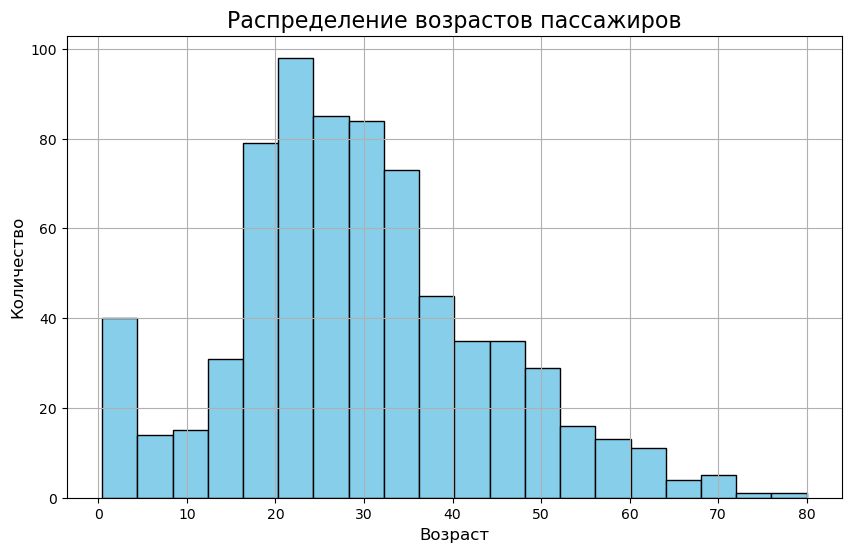

In [342]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['Age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Распределение возрастов пассажиров', fontsize=16)
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.grid(True)

plt.show()


2. Постройте гистограммы распределения цен для пассажиров разных классов

- Разбиение гистрограмм на `два графика` делает масштаб более наглядным и позволяет избежать наложения распределений цен.

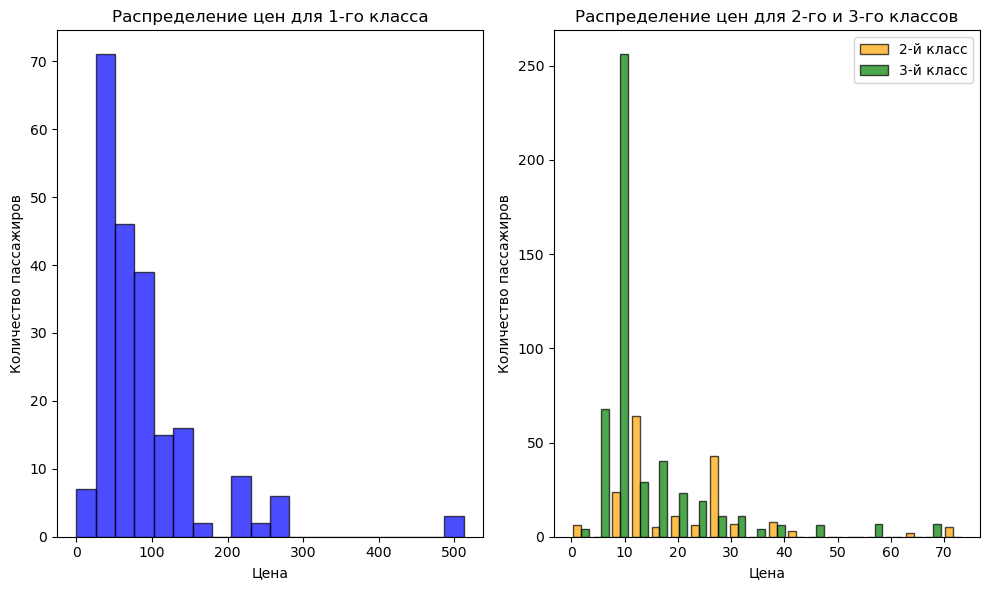

In [343]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.hist(
    df[df['Pclass'] == 1]['Fare'], 
    bins=20, color='blue', 
    edgecolor='black', 
    alpha=0.7
)
plt.title('Распределение цен для 1-го класса')
plt.xlabel('Цена')
plt.ylabel('Количество пассажиров')

plt.subplot(1, 2, 2)
plt.hist(
    [df[df['Pclass'] == 2]['Fare'], df[df['Pclass'] == 3]['Fare']], 
    bins=20, color=['orange', 'green'], 
    edgecolor='black', 
    alpha=0.7, 
    label=['2-й класс', '3-й класс']
)
plt.title('Распределение цен для 2-го и 3-го классов')
plt.xlabel('Цена')
plt.ylabel('Количество пассажиров')
plt.legend()

plt.tight_layout()
plt.show()

- Ниже представлен менее наглядный вариант.

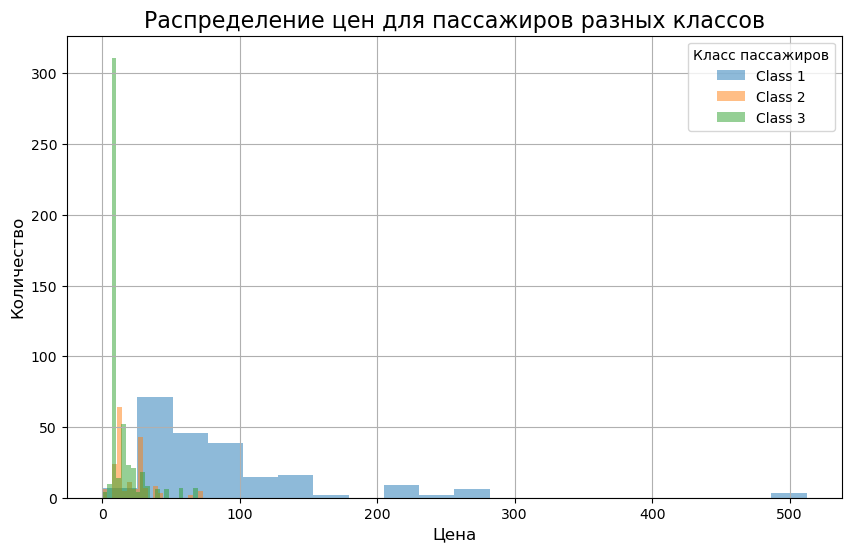

In [344]:
plt.figure(figsize=(10, 6))

for pclass in sorted(df['Pclass'].unique()):
    plt.hist(df[df['Pclass'] == pclass]['Fare'], bins=20, alpha=0.5, label=f'Class {pclass}')

plt.title('Распределение цен для пассажиров разных классов', fontsize=16)
plt.xlabel('Цена', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.legend(title="Класс пассажиров")
plt.grid(True)

plt.show()


3. Постройте зависимость цены от возраста пассажира

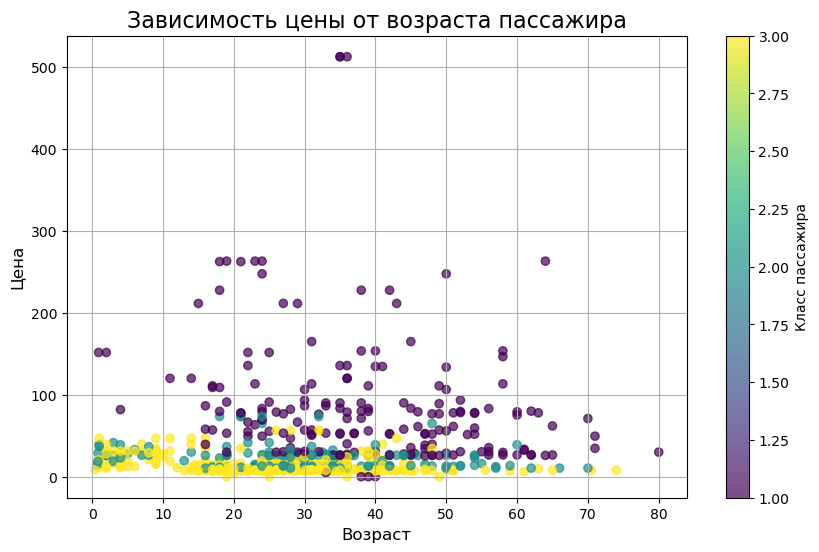

In [345]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Fare'], c=df['Pclass'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Класс пассажира')
plt.title('Зависимость цены от возраста пассажира', fontsize=16)
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Цена', fontsize=12)
plt.grid(True)

plt.show()

4. Постройте box plot отображающий распределение цен на билеты в разных классах

/tmp/ipykernel_240929/2715261104.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




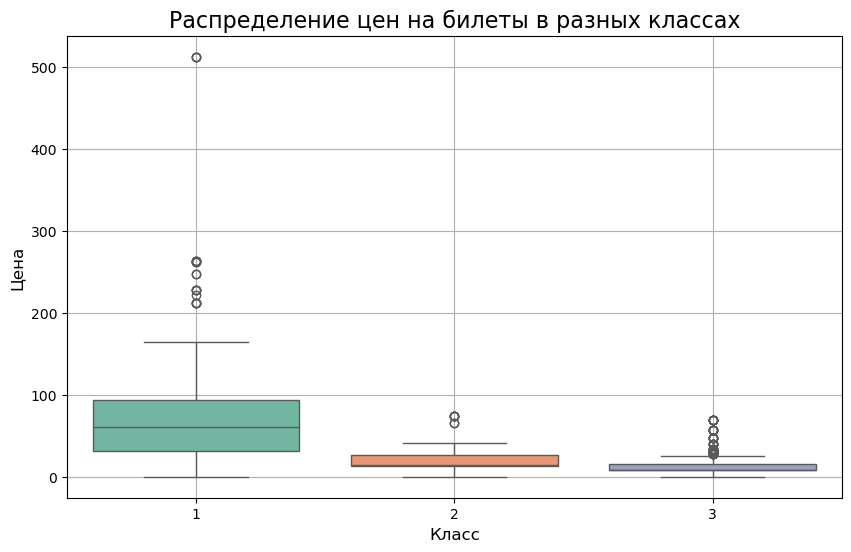

In [346]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=df, palette='Set2')

plt.title('Распределение цен на билеты в разных классах', fontsize=16)
plt.xlabel('Класс', fontsize=12)
plt.ylabel('Цена', fontsize=12)
plt.grid(True)

plt.show()

5. Визуализируйте распределение долей выживших среди мужчин, женщин и детей(до 16 лет)

В исследовании отдельно рассматриваются `2 подгруппы`:
1. Мужчины от 18 до 30 лет и старше;
2. Доли выживших женщин и детей.

Тогда визуализируем доли выживших в виде двух графиков по подгруппам.


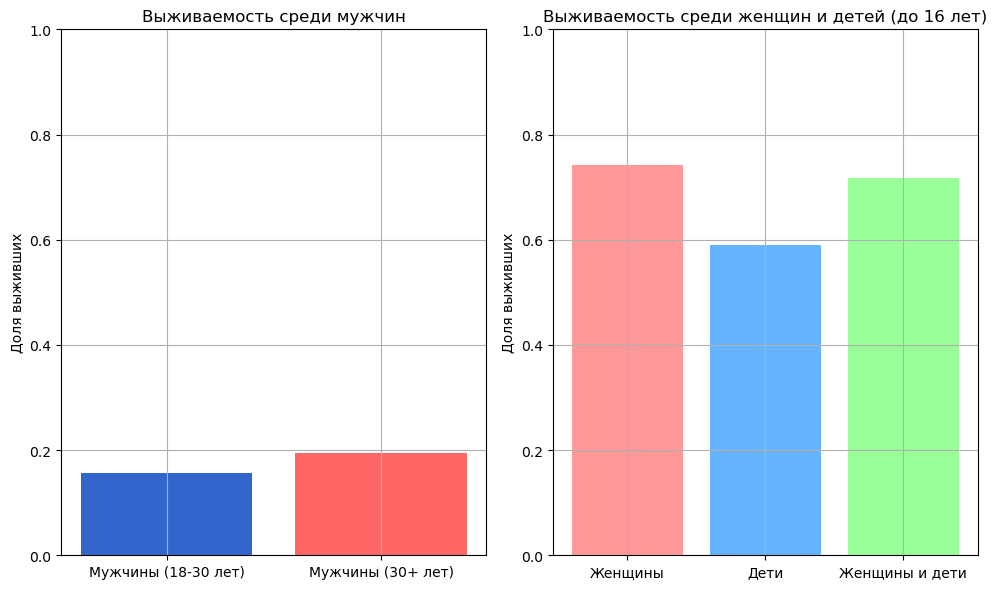

In [347]:
labels_women_kids = ['Женщины', 'Дети', 'Женщины и дети']
survival_rates_women_kids = [survival_rate_women / 100, survival_rate_kids / 100, survival_rate_women_and_kids / 100]

labels_men = ['Мужчины (18-30 лет)', 'Мужчины (30+ лет)']
survival_rates_men = [survival_rate_young_men / 100, survival_rate_older_men / 100]

fig, axs = plt.subplots(1, 2, figsize=(10, 6))

axs[0].bar(labels_men, survival_rates_men, color=['#3366cc', '#ff6666'])
axs[0].set_title('Выживаемость среди мужчин')
axs[0].set_ylabel('Доля выживших')
axs[0].set_ylim(0, 1)
axs[0].grid(True)

axs[1].bar(labels_women_kids, survival_rates_women_kids, color=['#ff9999', '#66b3ff', '#99ff99'])
axs[1].set_title('Выживаемость среди женщин и детей (до 16 лет)')
axs[1].set_ylabel('Доля выживших')
axs[1].set_ylim(0, 1)
axs[1].grid(True)

plt.tight_layout()
plt.show()

/tmp/ipykernel_240929/3671707434.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




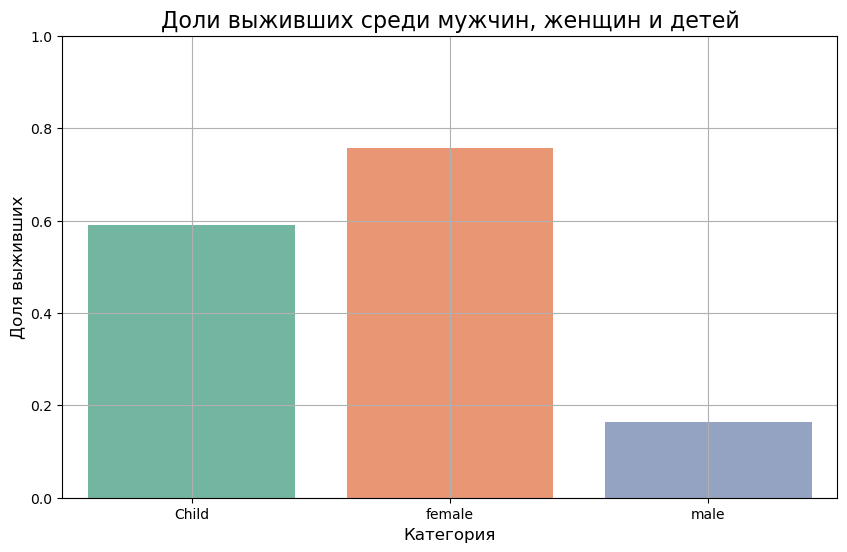

In [348]:
df['Category'] = df.apply(lambda row: 'Child' if row['Age'] < 16 else row['Sex'], axis=1)
survival_rates = df.groupby('Category')['Survived'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Survived', data=survival_rates, palette='Set2')

plt.title('Доли выживших среди мужчин, женщин и детей', fontsize=16)
plt.xlabel('Категория', fontsize=12)
plt.ylabel('Доля выживших', fontsize=12)
plt.ylim(0, 1)
plt.grid(True)

plt.show()

6. Сравните плотности распределения возростов выживших и умерших пассажиров, сделайте выводы

1. Большая часть выживших и умерших пассажиров находится в возрасте от 20 до 40 лет.
2. Пик плотности умерших: 20-25 лет, пик плотности выживших: 30 лет.
3. Плотность распределения умерших среди детей (до 16 лет) ниже, чем среди других возрастных групп.
4. После 40 лет плотность умерших не ниже плотности выживших, а после 60 превосходит её.

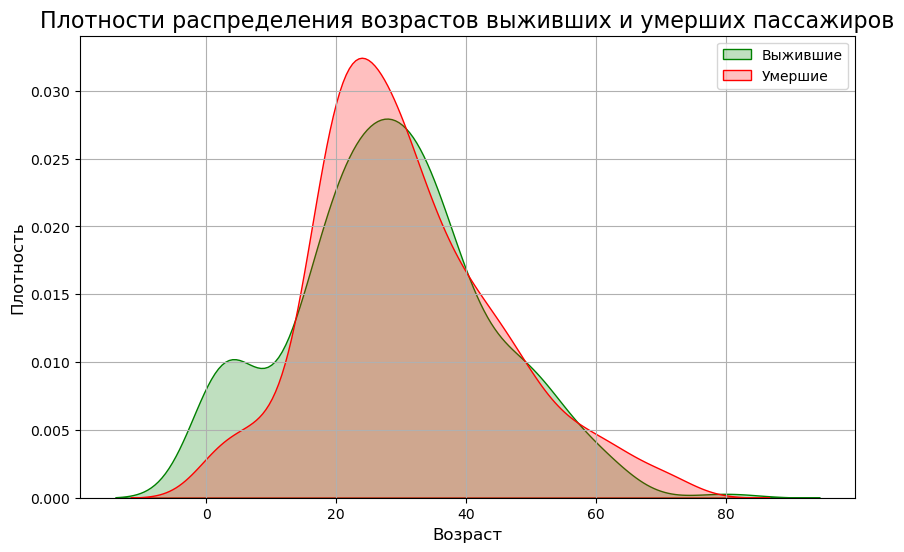

In [349]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
plt.figure(figsize=(10, 6))

sns.kdeplot(data=df[df['Survived'] == 1]['Age'].dropna(), label='Выжившие', fill=True, color='green')
sns.kdeplot(data=df[df['Survived'] == 0]['Age'].dropna(), label='Умершие', fill=True, color='red')

plt.title('Плотности распределения возрастов выживших и умерших пассажиров', fontsize=16)
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Плотность', fontsize=12)
plt.legend()
plt.grid(True)

plt.show()


7. Постройте круговую диаграмму отображающую выживаемость мужчин и женщин в разных классах обслуживания(визуализация должна быть интуитивно понятная без объяснений, женщины и мужчины соответствующих классов объеденены визуально в одну группу и 2 подгруппы)*

\* Задание на доп. балл

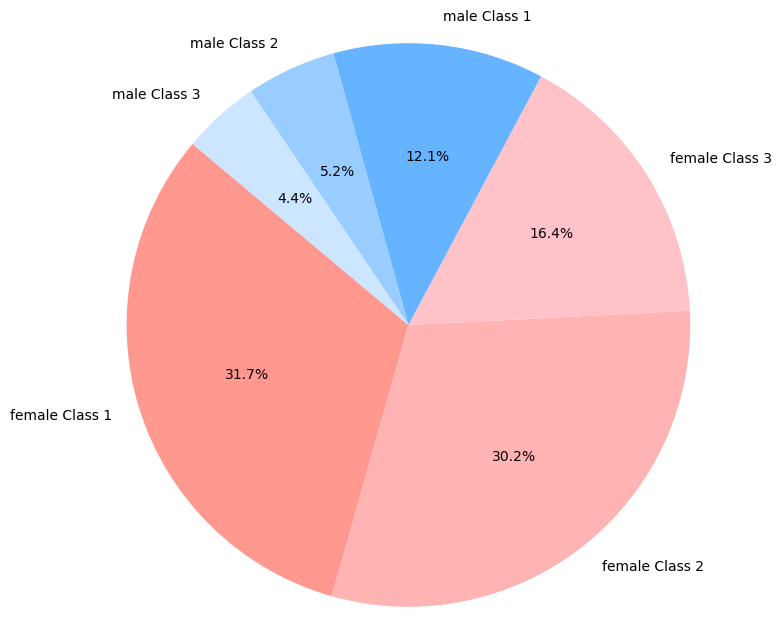

In [350]:
# Разбивка на категории по полу и классу обслуживания
df['Sex_Class'] = df['Sex'] + ' Class ' + df['Pclass'].astype(str)

# Группировка данных по новой категории и вычисление доли выживших
survival_by_sex_class = df.groupby('Sex_Class')['Survived'].mean().reset_index()

# Параметры круговой диаграммы
labels = survival_by_sex_class['Sex_Class']
sizes = survival_by_sex_class['Survived']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9990', '#ffb3b3', '#ffc2c9', '#66b3ff', '#99ccff', '#cce6ff'])
plt.axis('equal') 

plt.show()